# Introduction

Key takeaways
* Installing packages
* Handling data with pandas
* Unzipping Files with Python
* Using seaborn for vizualization
* Using matplotlib for vizualization
* Creating Lambda functions
* Deploying machine learning models
* Evaluating machine learning results
* Validating aggregates

# The CRISP-DM Process

For this project, I will be following the CRISP-DM (Cross-industry standard process for data mining) process.

![alt text](https://codesachin.files.wordpress.com/2015/09/crisp-dm.gif)
The process follows these steps:
    1. Pick a dataset
    2. Generate business questions
    3. Obtain data understanding
    4. Prepare the data
    5. Analyze, Model, and Visualize
    6. Evaluate your analysis
    7. Communicate business insights   
 
 
    
This project approaches these steps in the following way:
    1. Boston & Seattle Airbnb Open Data 
    2. I am starting with these business questions.
        a. What is the mission of Airbnb?
        b. What is more likely to cause bad reviews?
        c. What is the cost of bad reviews?
        d. What is the value of good reviews?
    3. Steps 3 to 6 will be conducted using a Jupyter notebook, and some Python 3 magic!

# Data Handling

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os

In [175]:
def unzip_files(zip_filename_list, folder=None):
    """
    Unzipping the datasets
    """
    folder_names = []
    for file in zip_filename_list:
        
        # paths
        filename_path = os.path.join('data', file)
        folder_name = filename_path[:-4].replace("-", "_")
        
        # extracting
        try:
            zip_ref = ZipFile(filename_path)
            zip_ref.extractall(folder_name)
            zip_ref.close()
        except:
            print('File already extracted!')
        
        # appending folder names
        if filename_path.find('.') >= 0:
            folder_names.append(folder_name)
        
    return folder_names

In [176]:
def read_concat(folder_names, target_file_name):
    """
    Reading files of different folders with same naming convention
    """
    df_con = pd.DataFrame()
    for folder in folder_names:
        target = os.path.join(folder, target_file_name)
        df = pd.read_csv(target)
        df['rowsource'] = target
        
        df_con = pd.concat([df_con, df], axis=0, sort=True)
    return df_con

## - Extracting Data

In [177]:
# getting zip file names
data_zip = os.listdir('data')
data_zip

['boston-airbnb-open-data.zip',
 'boston_airbnb_open_data',
 'seattle',
 'seattle.zip']

In [178]:
# extracting datasets
folder_names = unzip_files(data_zip)
folder_names

File already extracted!
File already extracted!


['data\\boston_airbnb_open_data', 'data\\seattle']

In [179]:
[os.listdir(folder_name) for folder_name in folder_names]

[['calendar.csv', 'listings.csv', 'reviews.csv'],
 ['calendar.csv', 'listings.csv', 'reviews.csv']]

## - Importing Data

---
First, we are importing the calendar dataset.

In [180]:
calendar = read_concat(folder_names, 'calendar.csv')

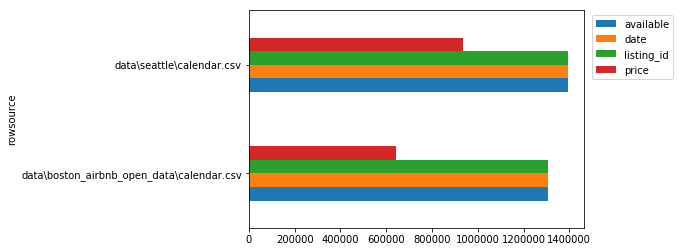

In [181]:
calendar.groupby('rowsource').count().plot.barh();
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');

---
Second, we are importing the listings dataset.

In [182]:
listings = read_concat(folder_names, 'listings.csv')

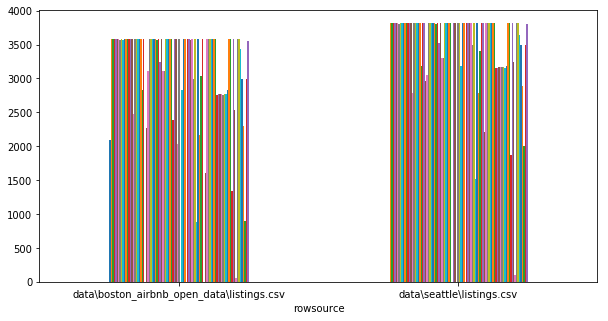

In [183]:
listings.groupby('rowsource').count().plot.bar(legend=False, figsize=(10, 5), rot=0);

In [289]:
listings.shape

(7403, 96)

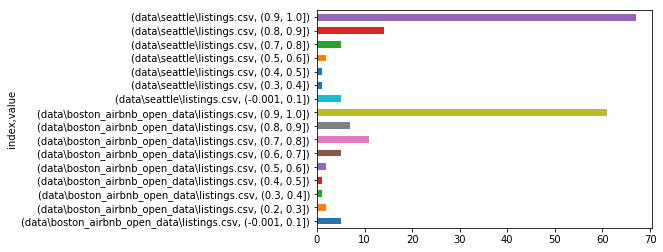

In [331]:
non_complete_listings = listings.groupby('rowsource')\
    .count()\
    .div(listings.rowsource.value_counts(), axis=0)\
    .reset_index()\
    .melt(id_vars='index')

non_complete_listings\
    .groupby(['index', pd.cut(non_complete_listings.value, bins=10)])\
    .size()\
    .plot.barh();

---
Third, we are importing the reviews dataset.

In [184]:
reviews = read_concat(folder_names, 'reviews.csv')

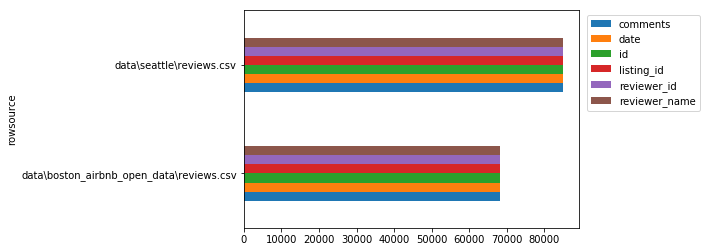

In [185]:
reviews.groupby('rowsource').count().plot.barh();
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left');

**Data Import Findings:**
* It is clear that calendar has missing prices.
* It is clear that there are multiple columns with missing values on both datasets.
* On the contrary, reviews are all complete.

## Data Understanding

## Preparing Data for Analysis

# Analysis & Visualizations

# Modeling & Visualizations

# Evaluating Results

# Conclussion